In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from keras.utils import image_dataset_from_directory

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load and preprocess the testing set

In [ ]:
img_size = (256,256)
TEST_DIR = './drive/MyDrive/brainmri/archive/Testing'

dataset_test = image_dataset_from_directory(directory = TEST_DIR, 
                                           label_mode = 'categorical', 
                                           shuffle = False, 
                                           batch_size = None,
                                           image_size = img_size,
                                           crop_to_aspect_ratio = True)

def normalize(image,label):
    image = tf.cast(image/255. ,tf.float32)
    label = tf.cast(label ,tf.float32)

    return image,label

labels_names = dataset_test.class_names
num_classes = len(labels_names)
dataset_test = dataset_test.map(normalize)

Found 394 files belonging to 4 classes.


In [ ]:
x_test = []
y_test = []
for (image, label) in dataset_test:
    x_test.append(image)
    y_test.append(label)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)
y_test = y_test.astype(np.uint8)

x_test, y_test = shuffle(x_test, y_test, random_state = 100)

print(x_test.shape)
print(y_test.shape)

(394, 256, 256, 3)
(394, 4)


## Visualize the Testing Set

In [ ]:
def visualize_data(images, labels, labels_names):
    
    L = 4
    W = 4

    fig, axes = plt.subplots(L, W, figsize = (10, 10))
    axes = axes.ravel()

    for i in range(L*W):
        j = np.random.randint(1, images.shape[0])
        axes[i].imshow(images[j], cmap = 'gray')
        axes[i].set_title(labels_names[np.argmax(labels[j])])
        axes[i].axis('off')
    plt.show()

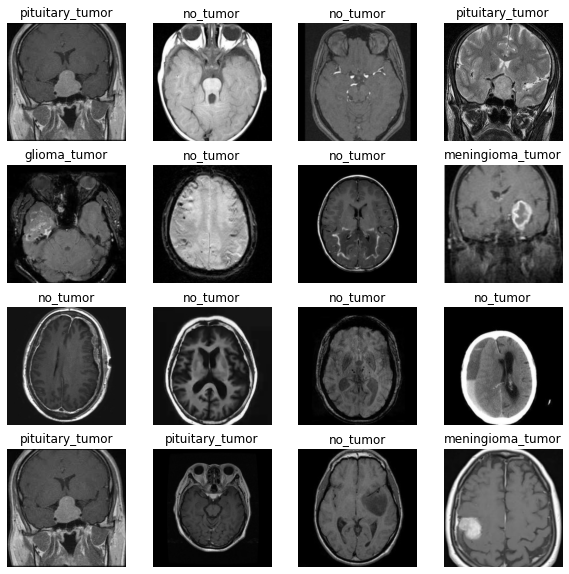

In [ ]:
visualize_data(x_test, y_test, labels_names)

## Load and evaluate the model

In [ ]:
folder_project = 'drive/MyDrive/brainmri'
model = load_model(folder_project + "/model_VGG16_01_augm.h5")

In [ ]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Accuracy Test : {:5.2f}%".format(100 * acc))

13/13 - 3s - loss: 2.8443 - accuracy: 0.7538 - 3s/epoch - 206ms/step
Accuracy Test : 75.38%


In [ ]:
y_pred = model.predict(x_test)

In [ ]:
original_labels = []
predicted_labels = []

for i in range(y_pred.shape[0]):
  original_labels.append(np.argmax(y_test[i]))
  predicted_labels.append(np.argmax(y_pred[i]))

original_labels = np.asarray(original_labels) 
predicted_labels = np.asarray(predicted_labels)


In [ ]:
# score = accuracy_score(original_labels,predicted_labels)
# print("Accuracy Test : {}".format(score))

Accuracy Test : 0.7538071065989848


### Visualize images with true label and predicted label

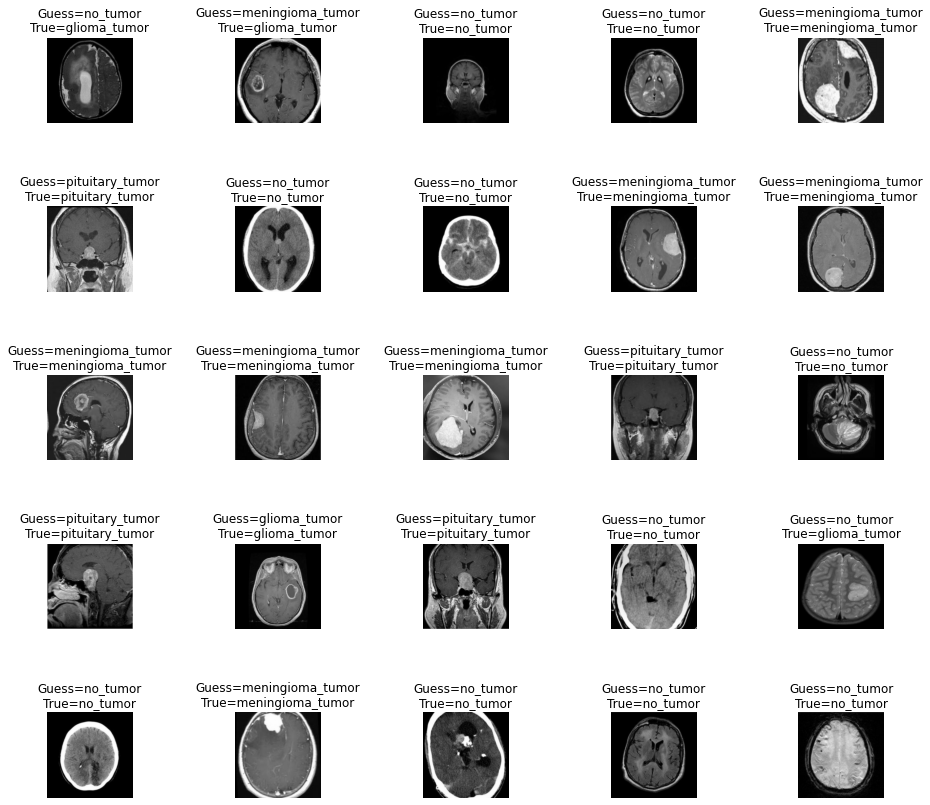

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (15, 15))
axes = axes.ravel()

for i in np.arange(0, L*W):
    j = np.random.randint(0, x_test.shape[0])
    axes[i].imshow(x_test[j])
    axes[i].set_title('Guess={}\nTrue={}'.format(str(labels_names[predicted_labels[j]]), 
                                                 str(labels_names[original_labels[j]])))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1.2) 
plt.savefig(folder_project + '/model_VGG16_01_aug/guess-true-plot-figures_05.jpg')
plt.show()
plt.close()

### Confusion matrix

In [ ]:
fig, ax= plt.subplots(figsize=(10,10))
sns.heatmap(confusion_matrix(original_labels, predicted_labels, normalize='true'), 
            annot=True, ax = ax, cmap=plt.cm.Blues); 

# labels, title and ticks
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Original')

ax.xaxis.set_ticklabels(labels_names) 
ax.yaxis.set_ticklabels(labels_names)

plt.savefig(folder_project + '/model_VGG16_01_aug/confusion_matrix.jpg')
plt.show()
plt.close()
